# SURFRAD

The [SURFRAD](https://gml.noaa.gov/grad/surfrad/sitepage.html) network was established in 1993 and is operated by the [National Oceanic and Atmospheric Administration (NOAA)](https://www.noaa.gov/). The network features six active and two inactive stations in the contiguous United States. The stations are all Tier 1 stations and measurements are generally of a very high quality due to rigorous maintenance procedures and frequent inspection of data.

The reader is referred to Augustine et al. (2000) and Augustine et al. (2005) for background information on the SURFRAD network.

```{admonition} Instrument calibrations
:class: dropdown
A list of the instruments used that have been used and their respective calibration coefficients can be found [here](https://gml.noaa.gov/grad/surfrad/getcals.html).
```


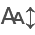

In [2]:
import pandas as pd
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)

stations = pd.read_csv('../solarstations.csv').fillna('')
stations = stations[stations['Network'].str.contains('SURFRAD')]
del stations['URL']  # Remove the URL column to avoid cluttering the site

show(stations, scrollCollapse=True, paging=False, classes="display", order=[[0, "asc"]],
     showIndex=False, columnDefs=[{"className": "dt-left", "targets": "_all"}])

In [5]:
import folium
from folium import plugins

EsriImagery = "https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}"
EsriAttribution = "Tiles &copy; Esri &mdash; Source: Esri, i-cubed, USDA, USGS, AEX, GeoEye, Getmapping, Aerogrid, IGN, IGP, UPR-EGP, and the GIS User Community"

# Create Folium map
m = folium.Map(
    location=[40, -100],
    zoom_start=4, min_zoom=2, max_bounds=True,
    control_scale=True,  # Adds distance scale in lower left corner
    tiles='openstreetmap',
)

# Add each station to the map
# Consider using apply instead of for loop to add stations in case of many stations
for index, row in stations.iterrows():
    color = 'blue'
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Station name'] + ' - ' + str(row['State']) + ' ' + row['Country'],
        tooltip=row['Abbreviation'],
        radius=5, # color=color, fill_color=color,
        fill=True).add_to(m)

folium.raster_layers.TileLayer(EsriImagery, name='World imagery', attr=EsriAttribution, show=False).add_to(m)
folium.LayerControl(position='topleft').add_to(m)

# Additional options and plugins
# Note it's not possible to change the position of the scale
plugins.MiniMap(toggle_display=True, zoom_level_fixed=1, minimized=True, position='bottomright').add_to(m)  # Add minimap to the map
plugins.Fullscreen(position='topright').add_to(m)  # Add full screen button to map
folium.LatLngPopup().add_to(m)  # Show latitude/longitude when clicking on the map

# Show the map
m

## Data retrieval

Measurements from the SURFRAD stations are stored in daily ASCII text files and can be freely downloaded from the [SURFRAD FTP server](https://gml.noaa.gov/aftp/data/radiation/surfrad/). Since January 1st, 2009, data has been logged as 1-minute averages. Prior to this, the data was stored as 3-minute averages.

Individual data files can be downloaded and parsed conveniently using the pvlib-python iotools module using the function [`pvlib.iotools.read_surfrad`](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.iotools.read_surfrad.html). Note, there is not yet a function to retrieve multiple SURFRAD files given a station and a date range. If you use pvlib iotools for published work, please cite Jensen et al. (2023) which provides additional background information. The use of the function is shown below, demonstrating how to retrieve five days of data:

In [12]:
import pvlib

filename = 'https://gml.noaa.gov/aftp/data/radiation/surfrad/bon/2020/bon20115.dat'

data, meta = pvlib.iotools.read_surfrad(filename)

# show a subset of the data
show(data.iloc[:, 7:], dom="tpr")

year  jday  month  day  hour  minute      dt  \
2020-04-24 00:00:00+00:00  2020   115      4   24     0       0   0.000   
2020-04-24 00:01:00+00:00  2020   115      4   24     0       1   0.017   
2020-04-24 00:02:00+00:00  2020   115      4   24     0       2   0.033   
2020-04-24 00:03:00+00:00  2020   115      4   24     0       3   0.050   
2020-04-24 00:04:00+00:00  2020   115      4   24     0       4   0.067   
...                         ...   ...    ...  ...   ...     ...     ...   
2020-04-24 23:55:00+00:00  2020   115      4   24    23      55  23.917   
2020-04-24 23:56:00+00:00  2020   115      4   24    23      56  23.933   
2020-04-24 23:57:00+00:00  2020   115      4   24    23      57  23.950   
2020-04-24 23:58:00+00:00  2020   115      4   24    23      58  23.967   
2020-04-24 23:59:00+00:00  2020   115      4   24    23      59  23.983   

                           solar_zenith   ghi  ghi_flag  ...  temp_air  \
2020-04-24 00:00:00+00:00         83.07  71.9         0  ...      14.4   
2020-04-24 00:01:00+00:00         83.25  69.3         0  ...      14.4   
2020-04-24 00:02:00+00:00         83.44  70.5         0  ...      14.4   
2020-04-24 00:03:00+00:00         83.62  73.1         0  ...      14.4   
2020-04-24 00:04:00+00:00         83.80  72.7         0  ...      14.4   
...                                 ...   ...       ...  ...       ...   
2020-04-24 23:55:00+00:00         81.97   2.0         0  ...      15.4   
2020-04-24 23:56:00+00:00         82.16   2.0         0  ...      15.4   
2020-04-24 23:57:00+00:00         82.34   2.0         0  ...      15.3   
2020-04-24 23:58:00+00:00         82.53   2.3         0  ...      15.2   
2020-04-24 23:59:00+00:00         82.71   2.4         0  ...      15.1   

                           temp_air_flag  relative_humidity  \
2020-04-24 00:00:00+00:00              0               82.0   
2020-04-24 00:01:00+00:00              0               82.2   
2020-04-24 00:02:00+00:00              0               81.6   
2020-04-24 00:03:00+00:00              0               81.6   
2020-04-24 00:04:00+00:00              0               81.6   
...                                  ...                ...   
2020-04-24 23:55:00+00:00              0               77.3   
2020-04-24 23:56:00+00:00              0               77.7   
2020-04-24 23:57:00+00:00              0               78.8   
2020-04-24 23:58:00+00:00              0               80.4   
2020-04-24 23:59:00+00:00              0               84.6   

                           relative_humidity_flag  wind_speed  \
2020-04-24 00:00:00+00:00                       0         3.0   
2020-04-24 00:01:00+00:00                       0         2.9   
2020-04-24 00:02:00+00:00                       0         2.9   
2020-04-24 00:03:00+00:00                       0         2.7   
2020-04-24 00:04:00+00:00                       0         2.4   
...                                           ...         ...   
2020-04-24 23:55:00+00:00                       0         4.0   
2020-04-24 23:56:00+00:00                       0         3.7   
2020-04-24 23:57:00+00:00                       0         3.5   
2020-04-24 23:58:00+00:00                       0         3.6   
2020-04-24 23:59:00+00:00                       0         4.1   

                           wind_speed_flag  wind_direction  \
2020-04-24 00:00:00+00:00                0            52.3   
2020-04-24 00:01:00+00:00                0            54.9   
2020-04-24 00:02:00+00:00                0            56.8   
2020-04-24 00:03:00+00:00                0            62.8   
2020-04-24 00:04:00+00:00                0            66.9   
...                                    ...             ...   
2020-04-24 23:55:00+00:00                0            58.0   
2020-04-24 23:56:00+00:00                0            57.2   
2020-04-24 23:57:00+00:00                0            51.7   
2020-04-24 23:58:00+00:00                0            43.0   
2020-04-24 23:59:

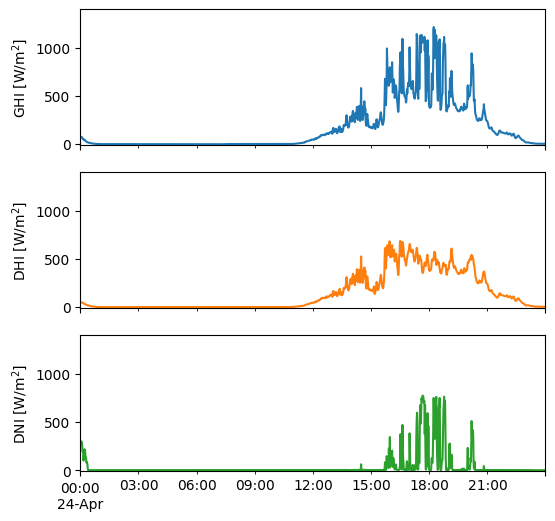

In [11]:
columns = ['ghi', 'dhi', 'dni']
axes = data[columns].plot(
    subplots=True, legend=False, rot=0, figsize=(6, 6), sharex=True)

# Set y-labels and y-limits
for ax, column in zip(axes, columns):
    ax.set_ylabel(f"{column.upper()} [W/m$^2$]")
    ax.set_ylim(-10, 1400)

## References
* Adam R. Jensen, Kevin S. Anderson, William F. Holmgren, Mark A. Mikofski, Clifford W. Hansen, Leland J. Boeman, and Roel Loonen. Pvlib iotools—open-source python functions for seamless access to solar irradiance data. Solar Energy, 266:112092, 2023. doi: [10.1016/j.solener.2023.112092](https://doi.org/10.1016/j.solener.2023.112092).
* J. A. Augustine, J. J. DeLuisi, and C. N. Long. SURFRAD — A national surface radiation budget network for atmospheric research. Bulletin of the American Meteorological Society, 81:2341–2357, 2000. doi: [10.1175/1520-0477(2000)081<2341:SANSRB>2.3.CO;2](https://doi.org/10.1175/1520-0477(2000)081<2341:SANSRB>2.3.CO;2).
* J. A. Augustine, G. B. Hodges, C. R. Cornwall, J. J. Michalsky, and C. I. Medina. An update on SURFRAD — the GCOS surface radiation budget network for the continental United States. Journal of Atmospheric and Oceanic Technology, 22:1460–1472, 2005. doi: [10.1175/JTECH1806.1](https://doi.org/10.1175/JTECH1806.1)